<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=6>
فاز سوم پروژه: تحلیل‌های آماری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت زیر تمامی لایبرری‌هایی که می‌خواهیم استفاده کنیم را
    <code>import</code>
    می‌کنیم.
</font>
</p>

In [1]:
from sqlalchemy import create_engine
from sqlalchemy import URL
from sqlalchemy import text
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سپس با استفاده از کد زیر یک
    <code>engine</code>
    برای ازتباط با دیتابی می‌سازیم.
</font>
</p>

In [5]:
DB_name = "TransferMarket"

url_object = URL.create(
    "mysql+mysqlconnector",
    username="fatemeh",
    password="",
    host="localhost",
    database=DB_name
)

engine = create_engine(url_object)

top5 = ('LaLiga' , 'Serie A' , 'Premier League' , 'Bundesliga' , 'Ligue 1')

champions_league = ('Manchester City', 'Paris Saint-Germain', 'RB Leipzig', 'Liverpool FC', 'Atlético de Madrid', 'AC Milan', 'Borussia Dortmund', 'Real Madrid', 'Inter Milan', 'Bayern Munich', 'FC Barcelona', 'Manchester United', 'Villarreal CF', 'Atalanta BC', 'LOSC Lille', 'Sevilla FC', 'VfL Wolfsburg', 'Juventus FC', 'Chelsea FC')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت زیر تابعهایی تحت عنوان
    <code>player_rate</code>
    و
    <code>club_rate</code>
پیاده‌سازی می‌کنیم که میزان عملکرد یک بازیکن و یا یک تیم را در فصل مشخص شده اندازه گیری می‌کند.
    <br>
    <span style="color:purple"><b>توضیحات:  </b></span>
    #TODO
</font>
</p>

In [6]:
def player_rate(player_id, season):
    with engine.connect() as conn:
        df = pd.read_sql(text(f"select position, goals, assists, own_goal, clean_sheets, goals_conceded from player left join person_detail pd on player.person_id = pd.person_id where season = {season} and player.person_id = {player_id}"), conn)
        if len(df) == 0:
            return None
        if df.iloc[0]['position'] is np.nan:
            return df.iloc[0]['goals'] + df.iloc[0]['assists'] - df.iloc[0]['own_goal']
        
        elif df.iloc[0]['position'] == 'Goalkeeper':
            return 3*df.iloc[0]['clean_sheets'] - df.iloc[0]['goals_conceded']
        
        elif df.iloc[0]['position'] == 'midfield':
            return df.iloc[0]['goals'] + 1.5 * df.iloc[0]['assists'] - df.iloc[0]['own_goal']
        
        elif df.iloc[0]['position'] == 'Attack':
            return 1.5 * df.iloc[0]['goals'] + df.iloc[0]['assists'] - df.iloc[0]['own_goal']
        
        else:
            return df.iloc[0]['goals'] + df.iloc[0]['assists'] - df.iloc[0]['own_goal']
            

def club_rate(club, season):
    with engine.connect() as conn:
        try:
            df = pd.read_sql(text(f"select person_id as player from player where club = '{club}' and season = {season}"), conn)
        except:
            return None
        l = []
        for player in df['player']:
            rate = player_rate(player, season)
            if rate is not None:
                l.append(rate)
        if len(l) == 0:
            return None
        else:
            return np.array(l).mean()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آمار توصیفی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش می‌خواهیم با بررسی داده‌های سایت transfermarkt، شهودی نسبت به وضعیت ۵ لیگ برتر اروپا داشته باشیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>بخش اول:  </b></span>
    با استفاده از داده‌های فصل ۲۰۲۱-۲۰۲۲، توزیع تعداد بازی‌هایی که بازیکنان در یک فصل انجام می‌دهند را به دست می‌آوریم. هم‌چنین نشان می‌دهیم که بازیکنان در چند درصد از بازی‌ها شرکت کرده‌اند.
</font>
</p>

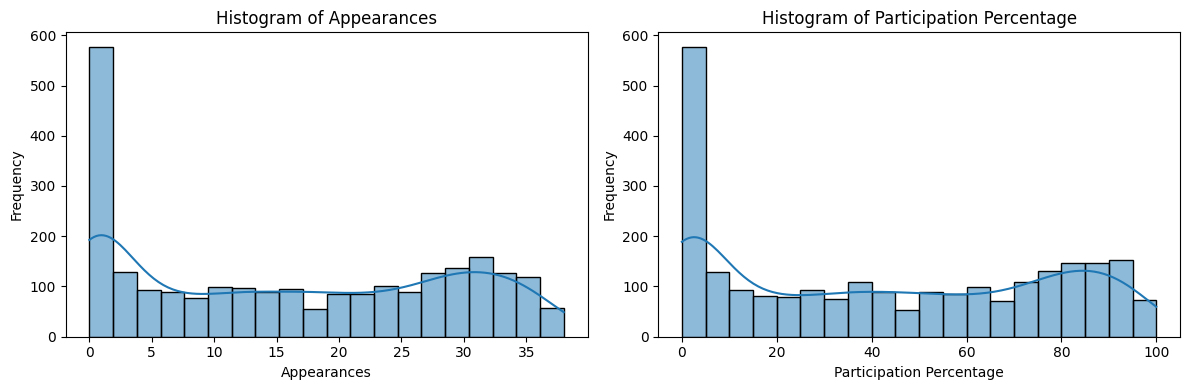

In [78]:
with engine.connect() as conn:
    df = pd.read_sql(text(f"select if(appearances is null, 0, appearances) as x, if(league = 'Bundesliga', 34, 38) as y from player where season = 2021 and league in {top5}"), conn)


fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, facecolor='white')

ax[0].set_title("Histogram of Appearances")
ax[0].set_xlabel("Appearances")
ax[0].set_ylabel("Frequency")
sns.histplot(df.x, bins=20, kde=True, ax=ax[0])

df.y = (df.x / df.y) * 100

ax[1].set_title("Histogram of Participation Percentage")
ax[1].set_xlabel("Participation Percentage")
ax[1].set_ylabel("Frequency")
sns.histplot(df.y, bins=20, kde=True, ax=ax[1])

plt.tight_layout()
plt.show()





<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>بخش دوم:  </b></span>
    با استفاده از داده‌های فصل ۲۰۲۱-۲۰۲۲، بررسی می‌کنیم که‌ چه ارتباطی بین تعداد گل‌های زده‌شده و قیمت تخمینی سایت برای یک بازیکن وجود دارد.
</font>
</p>

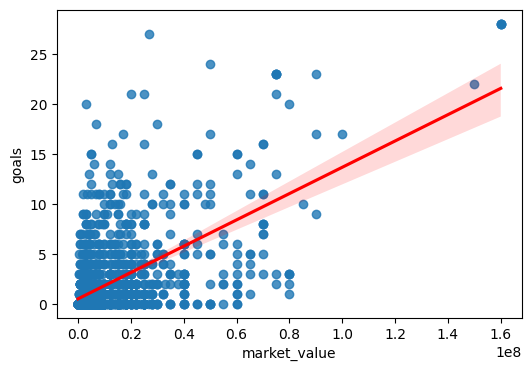

In [30]:
with engine.connect() as conn:
    df = pd.read_sql(text(f"select market_value, goals from player where season = 2021 and league in {top5} and market_value is not null"), conn)
    df['market_value'] = df['market_value'].astype(float)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.regplot(x='market_value', y='goals', data=df, ax=ax, line_kws={'color': 'red'})


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>نتیجه:  </b></span>
    با توجه به نمودار رسم شده می‌توان نتیجه گرفت هرچه ارزش یک بازیکن بیشتر باشد تعداد گل‌هایش نیز بیشتز است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>بخش سوم:  </b></span>
    با استفاده از داده‌های فصل ۲۰۲۱-۲۰۲۲، بررسی می‌کنیم که چه ارتباطی بین تعداد گل‌های زده‌شده و قیمت تخمینی سایت برای یک مهاجم وجود دارد.
</font>
</p>

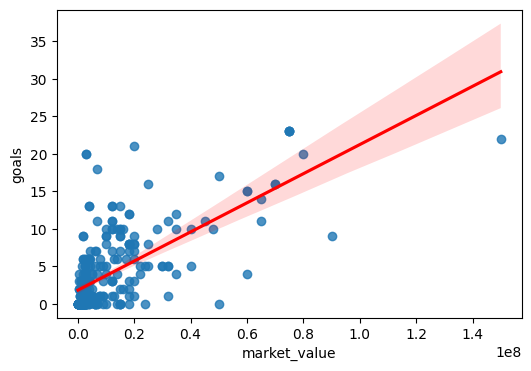

In [31]:
with engine.connect() as conn:
    df = pd.read_sql(text(f"select market_value, goals from player join person_detail pd on player.person_id = pd.person_id where season = 2021 and league in {top5} and position like 'Attack%' and market_value is not null"), conn)
    df['market_value'] = df['market_value'].astype(float)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.regplot(x='market_value', y='goals', data=df, ax=ax, line_kws={'color': 'red'})

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>نتیجه:  </b></span>
    نتیجه‌ای که می‌توان گزفت این است که یک مهاجم هرچه ارزشش بیشتر باشد میزان گلزنی آن بیشتر است و اگر کمی دقت کنیم شیب نمودار این قسمت از قسمت قبلی بیشتر می‌باشد که یعنی میزان تاثیر گلزنی و ارزش درون مهاجم‌ها به نسبت کل بازیکنان بیشتر است. 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>بخش چهارم:  </b></span>
    با استفاده از داده‌های فصل ۲۰۲۱-۲۰۲۲، توزیع قیمت تخمینی بازیکنان را با تفکیک پست بازیکنان به دست می‌آوریم.
</font>
</p>

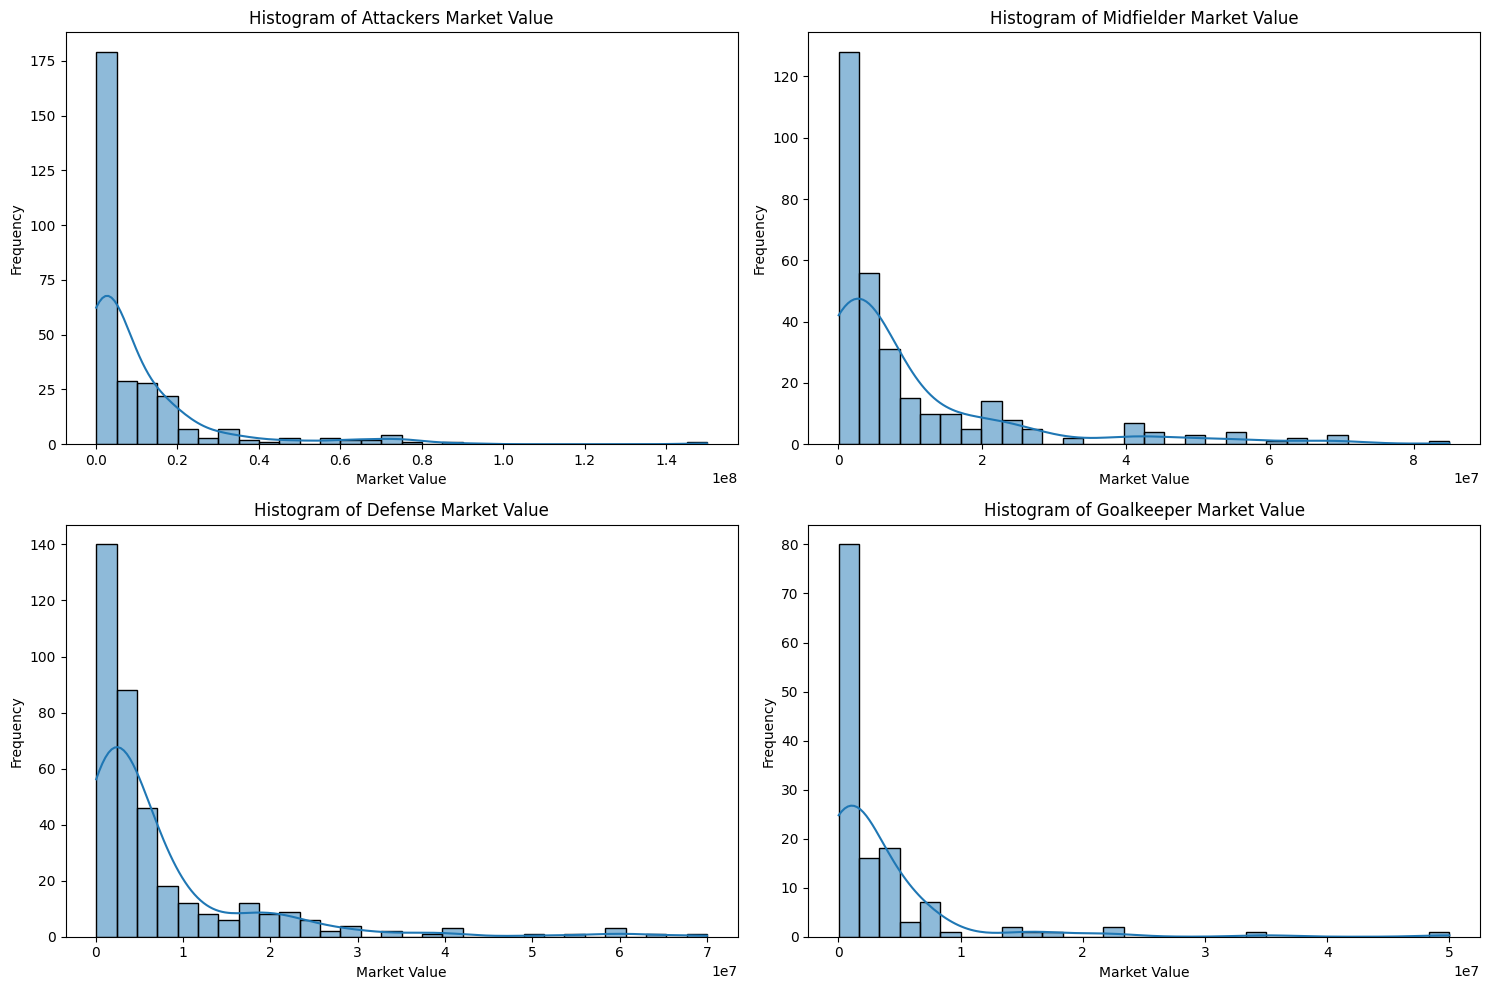

In [79]:
with engine.connect() as conn:
    df_a = pd.read_sql(text(f"select market_value as mv from player join person_detail pd on player.person_id = pd.person_id where season = 2021 and league in {top5} and position = 'Attack' and market_value is not null"), conn)
    df_m = pd.read_sql(text(f"select market_value as mv from player join person_detail pd on player.person_id = pd.person_id where season = 2021 and league in {top5} and position = 'midfield' and market_value is not null"), conn)
    df_d = pd.read_sql(text(f"select market_value as mv from player join person_detail pd on player.person_id = pd.person_id where season = 2021 and league in {top5} and position = 'Defender' and market_value is not null"), conn)
    df_g = pd.read_sql(text(f"select market_value as mv from player join person_detail pd on player.person_id = pd.person_id where season = 2021 and league in {top5} and position = 'Goalkeeper' and market_value is not null"), conn)
    
    df_a['mv'] = df_a['mv'].astype(float)
    df_m['mv'] = df_m['mv'].astype(float)
    df_d['mv'] = df_d['mv'].astype(float)
    df_g['mv'] = df_g['mv'].astype(float)

fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2, facecolor='white')


sns.histplot(df_a.mv, bins=30,kde=True, ax=ax[0, 0])
ax[0, 0].set_title("Histogram of Attackers Market Value")
ax[0, 0].set_xlabel("Market Value")
ax[0, 0].set_ylabel("Frequency")


sns.histplot(df_m.mv, bins=30,kde=True, ax=ax[0, 1])
ax[0, 1].set_title("Histogram of Midfielder Market Value")
ax[0, 1].set_xlabel("Market Value")
ax[0, 1].set_ylabel("Frequency")


sns.histplot(df_d.mv, bins=30,kde=True,  ax=ax[1, 0])
ax[1, 0].set_title("Histogram of Defense Market Value")
ax[1, 0].set_xlabel("Market Value")
ax[1, 0].set_ylabel("Frequency")

sns.histplot(df_g.mv, bins=30,kde=True,  ax=ax[1, 1])
ax[1, 1].set_title("Histogram of Goalkeeper Market Value")
ax[1, 1].set_xlabel("Market Value")
ax[1, 1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()
    


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>نتیجه:  </b></span>
    با توجه به نمودار متوجه می‌شویم که به صورت میانگین ترتیب ارزش بازیکن‌ها در پست‌های مختلف به شکل زیر است.
    <br>
    مهاجم > هافبک > دفاع > دروازبان
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>بخش پنجم:  </b></span>
    با استفاده از داده‌های فصل ۲۰۲۱-۲۰۲۲، تعداد گل‌های زده‌شده در لیگ‌های مختلف را بدست می‌آوریم.
</font>
</p>

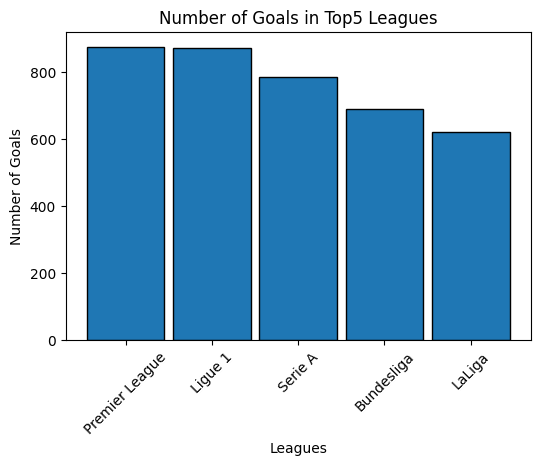

In [44]:
with engine.connect() as conn:
    df = pd.read_sql(text(f"select league, sum(goals) as goals from player where season = 2021 and league in {top5} group by league"), conn)
    fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
    ax.bar(df.league, df.goals, width=0.9, align='center', edgecolor='black')
    ax.set_title("Number of Goals in Top5 Leagues")
    ax.set_xticks(df.league, rotation=45, labels=df.league, fontsize=10)
    ax.set_xlabel("Leagues")
    ax.set_ylabel("Number of Goals")
    plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>بخش ششم:  </b></span>
    با استفاده از داده‌های فصل ۲۰۱۷-۲۰۱۸ تا ۲۰۲۱-۲۰۲۲، توزیع میزان هزینه‌ای که تیم‌ها در هر فصل برای خرید بازیکنان داشته‌اند را به‌دست می‌آوریم.
</font>
</p>

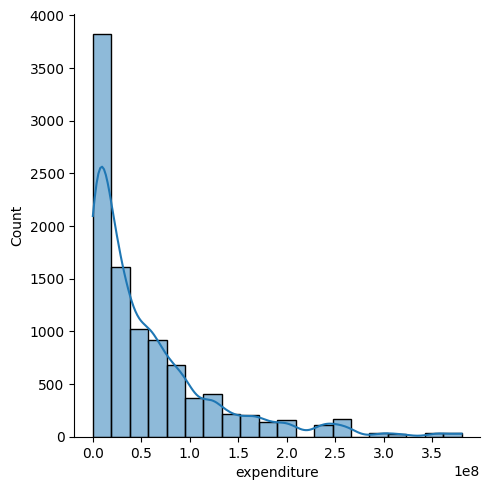

In [54]:
def change_exp(inp:str):
    try:
        return float(inp)
    except:
        coef = inp[-1]
        inp = float(inp[1:-1])
        if coef == 'k':
            inp = inp * 1000
        else:
            inp = inp * 1000000
        return inp
        

with engine.connect() as conn:
    df = pd.read_sql(text(f"select expenditure from clubsseason inner join club_leagues cl on clubsseason.club_id = cl.club_id inner join leagues l on cl.league_id = l.league_id where name in {top5} and season_id in (2021, 2020, 2019, 2018, 2017)"), conn)
    df['expenditure'] = df['expenditure'].astype(str)
    df['expenditure'] = df['expenditure'].apply(change_exp)
    
    
    sns.displot(df.expenditure, bins=20,kde =True)
    ax.set_title("Histogram of Expenditure")
    ax.set_xlabel("Expenditure")
    ax.set_ylabel("Frequency")
    plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 درخواست کارشناس
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>شرح درخواست:  </b></span>
    یکی از کارشناسان، می‌خواهد بداند که سایت transfermarkt به چه میزان تخمین درستی از قیمت بازیکنان ارائه می‌دهد.
<br>
    اخیراً مشکلی در صنعت فوتبال پیش آمده است که بازیکنان با قیمت بسیار بیشتری از ارزش واقعی‌شان معامله می‌شوند. به همین دلیل، با استفاده از داده‌های فصل ۲۰۱۷-۲۰۱۸ تا ۲۰۲۱-۲۰۲۲، می‌خواهیم توزیع قیمت تخمین بازیکنان فروخته شده در هر فصل، و قیمت واقعی انتقال‌های هر فصل را با هم مقایسه کنیم.
<br>
<span style="color:black"><b>توجه:  </b></span>
    در این بخش از انتقال‌های رایگان و قرضی صرف نظر می‌کنیم.
</font>
</p>

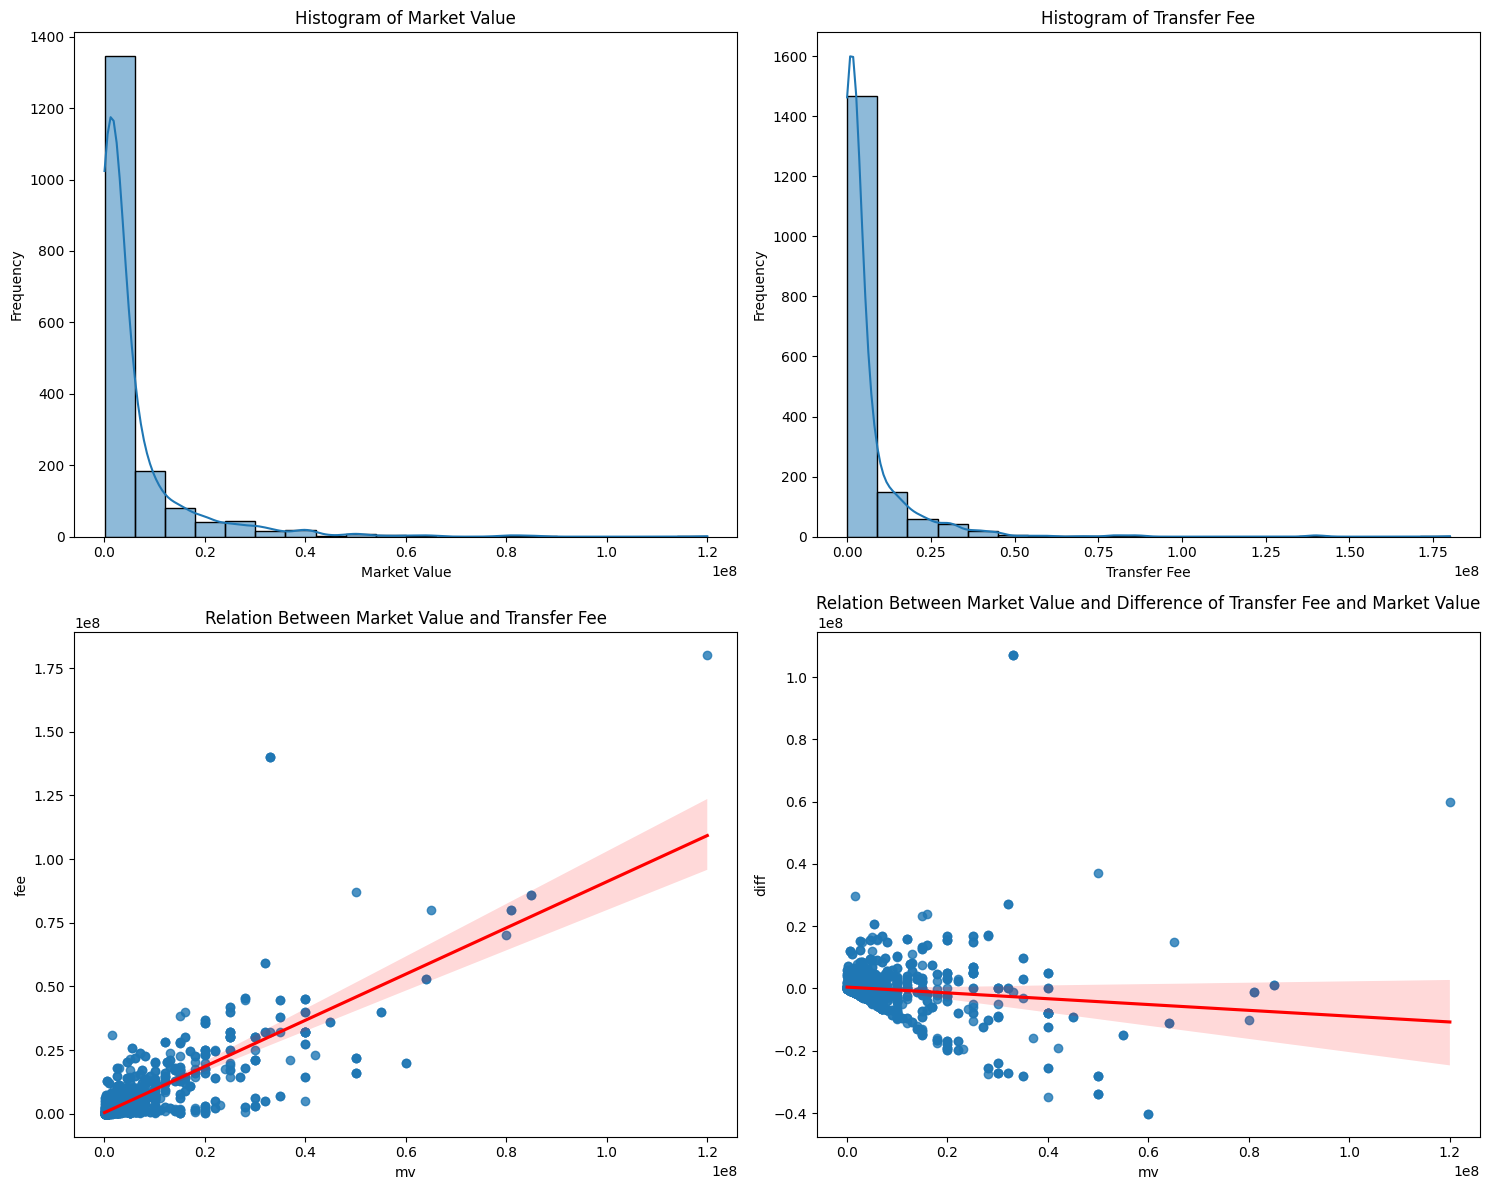

In [76]:
def change_exp(inp:str):
    if 'Leihgebühr' in inp:
        inp = inp[11:]
    inp = inp.replace(',','.')
    coef = inp[-3]
    inp = float(inp[:-4])
    if coef == 'k':
        inp = inp * 1000
    else:
        inp = inp * 1000000
    return inp
    
with engine.connect() as conn:
    df = pd.read_sql(text("select mv, fee from players_transfor where season in (2017, 2018, 2019, 2020, 2021) and mv is not null and fee is not null and mv like '%€' and fee like '%€' and fee not in ('free transfer', 'loan', 'End of loan', '?')"), conn)
    df['mv'] = df['mv'].astype(str)
    df['mv'] = df['mv'].apply(change_exp)
    df['fee'] = df['fee'].astype(str)
    df['fee'] = df['fee'].apply(change_exp)
    
    df['diff'] = df['fee'] - df['mv']
fig, ax = plt.subplots(figsize=(15, 12), nrows=2, ncols=2, facecolor='white')

ax[0, 0].set_title("Histogram of Market Value")
ax[0, 0].set_xlabel("Market Value")
ax[0, 0].set_ylabel("Frequency")
sns.histplot(df['mv'],kde=True, bins=20, edgecolor='black', ax=ax[0, 0])

ax[0, 1].set_title("Histogram of Transfer Fee")
ax[0, 1].set_xlabel("Transfer Fee")
ax[0, 1].set_ylabel("Frequency")
sns.histplot(df['fee'],kde=True, bins=20, edgecolor='black', ax=ax[0, 1])

ax[1, 0].set_title("Relation Between Market Value and Transfer Fee")
ax[1, 0].set_xlabel("Market Value")
ax[1, 0].set_ylabel("Transfer Fee")
sns.regplot(x='mv', y='fee', data=df, ax=ax[1, 0], line_kws={'color': 'red'})

ax[1, 1].set_title("Relation Between Market Value and Difference of Transfer Fee and Market Value")
ax[1, 1].set_xlabel("Market Value")
ax[1, 1].set_ylabel("Difference of Transfer Fee and Market Value")
sns.regplot(x='mv', y='diff', data=df, ax=ax[1, 1], line_kws={'color': 'red'})

plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 درخواست بازیکنان
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>شرح درخواست:  </b></span>
    یک مهاجم می‌خواهد تیم خود را عوض کند، و به همین دلیل، به دنبال تیم‌هایی می‌گردد که به یک مهاجم نیاز دارند.
<br>
نیاز تیم به یک مهاجم، به این صورت مطرح می‌شود که عملکرد بازیکنان در حمله، بدتر از عملکرد بازیکنان در دفاع باشد. هر تیمی که این ویژگی را داشته باشد، یک گزینه‌ی مناسب به حساب می‌آید.
<br>
در این قسمت، با استفاده از داده‌های فصل ۲۰۲۱-۲۰۲۲، می‌خواهیم تیم‌ها را بر اساس میزان اختلاف عملکر دفاع و حمله‌شان مرتب کنیم. 
</font>
</p>

In [35]:
with engine.connect() as conn:
    clubs = pd.read_sql(text("select name from clubs"), conn)
    data = []
    
    for club in clubs['name']:
        try:
            attackers = pd.read_sql(text(f"select player.person_id as player from player inner join person_detail pd on player.person_id = pd.person_id where season = 2021 and club = '{club}' and position = 'Attack'"), conn)
        except:
            continue
        attackers_rate = np.array([player_rate(player, 2021) for player in attackers['player']])
        if len(attackers_rate) == 0:
            attackers_rate = 0
        else:
            attackers_rate = attackers_rate.mean()
        
        try:
            defenders = pd.read_sql(text(f"select player.person_id as player from player inner join person_detail pd on player.person_id = pd.person_id where season = 2021 and club = '{club}' and position = 'Defender'"), conn)
        except:
            continue
        defenders_rate = np.array([player_rate(player, 2021) for player in defenders['player']])
        if len(defenders_rate) == 0:
            defenders_rate = 0
        else:
            defenders_rate = defenders_rate.mean()
        
        data.append({'name': club, 'diff':defenders_rate-attackers_rate})
        
    
    df = pd.DataFrame(data)
    df = df.sort_values(by='diff', ascending=False)
df

,name,diff
1,1.FC Kaiserslautern,5.000000
512,CF Rayo Majadahonda,4.750000
123,SGV Freiberg,4.000000
49,SV Waldhof Mannheim,3.666667
61,SV Wehen Wiesbaden,3.625000
...,...,...
23,Liverpool FC,-27.500000
2,1.FC Köln,-32.750000
72,Tottenham Hotspur,-33.300000
344,Gateshead FC,-36.000000


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 درخواست مربی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>شرح درخواست اول:  </b></span>
    یک مربی قصد دارد که تیم را برای فصل بعد تقویت کند. به همین دلیل، می‌خواهد بازیکنانی را پیدا کند که عملکرد خیلی خوبی داشته‌اند و در عین حال، قیمت پایینی دارند.
<br>
برای این کار، بازیکنانی را پیدا می‌کنیم که در  فصل ۲۰۲۱-۲۰۲۲ از لحاظ عملکردی، در ۳۰ درصد برتر قرار می‌گیرند ولی از لحاظ قیمتی، در ۴۰ درصد پایین قرار می‌گیرند. 
</font>
</p>

In [82]:
with engine.connect() as conn:
    df = pd.read_sql(text("select player.person_id, market_value, name, position from player inner join person p on player.person_id = p.id inner join person_detail pd on p.id = pd.person_id where season = 2021 and market_value is not null"), conn)
    df['market_value'] = df['market_value'].astype(float)
    top30 = pd.DataFrame(columns=['person_id', 'rate'])
    
    for i in range(len(df)):
        rate = player_rate(df.iloc[i]['person_id'], 2021)
        top30.loc[len(top30)] = [df.iloc[i]['person_id'], rate]
    
    top30 = top30.sort_values(by='rate', ascending=False).head(int(0.3 * len(top30)))
    down40 = df.sort_values(by='market_value', ascending=True).head(int(0.4 * len(df)))
    df = pd.merge(top30, down40, how='inner', on='person_id')
df

,person_id,rate,market_value,name,position
0,598136.0,27.5,125000.0,Christoph Maier,Attack
1,75295.0,27.5,600000.0,John Verhoek,Attack
2,222361.0,25.5,50000.0,Patrick Hofmann,Attack
3,222361.0,25.5,50000.0,Patrick Hofmann,Attack
4,222361.0,25.5,50000.0,Patrick Hofmann,Attack
...,...,...,...,...,...
211,242412.0,3.0,250000.0,Gethin Jones,Defender
212,242412.0,3.0,250000.0,Gethin Jones,Defender
213,242412.0,3.0,250000.0,Gethin Jones,Defender
214,417414.0,3.0,50000.0,Davide Marfella,Goalkeeper


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در ادامه:
    <br>
<span style="color:purple"><b>*</b></span>
    نمودار توزیع قیمت بازیکنانی که در قسمت اول بدست آوردیم را با کل جامعه‌ی بازیکنان مقایسه می‌کنیم.
</font>
</p>

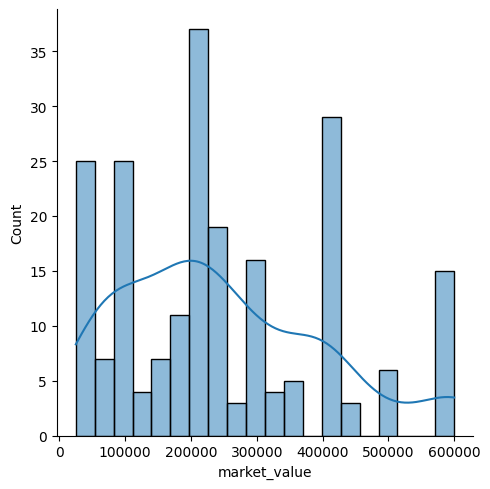

In [84]:

sns.displot(df.market_value,kde=True, bins=20, edgecolor='black')
ax.set_title("Histogram of Market Value")
ax.set_xlabel("Market Value")
ax.set_ylabel("Frequency")
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>*</b></span>
    نمودار توزیع عملکرد بازیکنانی که در قسمت اول بدست آوردیم را با کل جامعه‌ی بازیکنان مقایسه می‌کنیم.
</font>
</p>

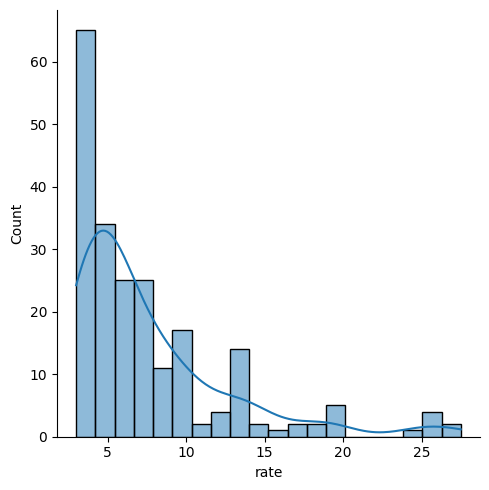

In [85]:

sns.displot(df.rate,kde = True, bins=20, edgecolor='black')
ax.set_title("Histogram of Rate")
ax.set_xlabel("Rate")
ax.set_ylabel("Frequency")
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>*</b></span>
    نمودار توزیع پست بازیکنانی که در قسمت اول بدست آوردید را با کل جامعه‌ی بازیکنان مقایسه کنید.
</font>
</p>

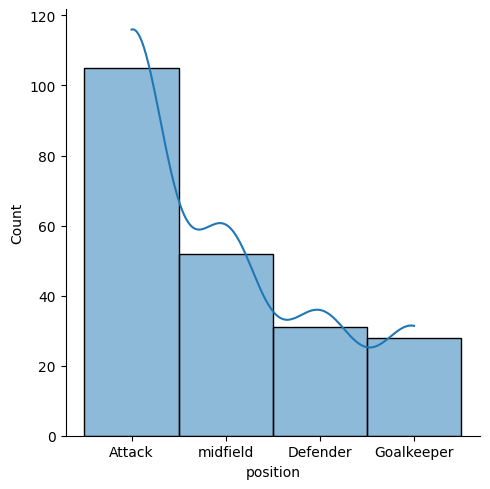

In [86]:

sns.displot(df.position,kde = True, edgecolor='black')
ax.set_title("Histogram of Position")
ax.set_xlabel("Position")
ax.set_ylabel("Frequency")
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>شرح درخواست دوم:  </b></span>
مربیان تیم‌های قهرمان ۵ لیگ برتر اروپا در فصل ۲۰۲۱-۲۰۲۲، می‌خواهند بازیکنانی که عملکرد مناسبی در تیم‌هایشان نداشته‌اند را پیدا کنند.
<br>
برای این کار، بر اساس معیاری که برای سنجش عملکرد بازیکنان طراحی کردیم، بازیکنانی که داده‌ی پرت حساب می‌شوند و عملکرد بدتری از سایر بازیکنان داشته‌اند را پیدا می‌کنیم. 
</font>
</p>

In [117]:
with engine.connect() as conn:
    champions = pd.read_sql(text(f"select distinct name, winner from `leagues details season` inner join leagues l on `leagues details season`.league_id = l.league_id where saison = 2021 and name in {top5}"), conn)
    champions = tuple(champions['winner'])
    players = pd.read_sql(text(f"select distinct name, person_id from player inner join person p on player.person_id = p.id where season = 2021 and club in {champions}"), conn)
    
    df = pd.DataFrame(columns=['person_id', 'rate'])
    
    for player in list(players['person_id']):
        rate = player_rate(player, 2021)
        df.loc[len(df)] = [player, rate]
    
    df = pd.merge(players, df, how='inner', on='person_id')
    df = df.sort_values(by='rate', ascending=True)
df.head(int(0.15*len(df)))


,name,person_id,rate
52,Diego Pineiro,926850,0.0
47,Luis Lopez,623525,0.0
41,Thibaut Courtois,108390,0.0
48,Toni Fuidias,623526,0.0
51,Marko Lazetic,698548,0.0
24,Alessandro Plizzari,357991,0.0
45,Luke Mbete,609883,0.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 تست فرض
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>فرضیه‌ی اول:  </b></span>
بازیکنان با تجربه (با حداقل ۳۰ سال سن)،‌ در اولین فصل حضورشان در یک تیم جدید، به صورت کلی، عملکرد بهتری نسبت به بازیکنان کم تجربه (با سن کمتر از ۳۰) در اولین فصل‌شان در تیم جدید، دارند.
<br>
<span style="color:black"><b>توجه:  </b></span>
    در این بخش، از داده‌های فصل ۲۰۱۷-۲۰۱۸ تا ۲۰۲۱-۲۰۲۲ استفاده می‌کنیم.
</font>
</p>

In [36]:
with engine.connect() as conn:
    df = pd.read_sql(text("select pd.person_id as player, season, pd.date as bd from players_transfor inner join person_detail pd on players_transfor.person_id = pd.person_id where season in (2017, 2018, 2019, 2020, 2021) and pd.date is not null "), conn)
    x = []
    y = []
    for i in range(len(df)):
        rate = player_rate(df.iloc[i]['player'], df.iloc[i]['season'])
        if rate is None:
            continue
        if df.iloc[i]['season']-df.iloc[i]['bd'].year >= 30:
            x.append(rate)
        else:
            y.append(rate)
    x = np.array(x)
    y = np.array(y)
    x_m = x.mean()
    y_m = y.mean()
    std_x = math.sqrt(((x-x_m)**2).sum()/(len(x)-1))
    std_y = math.sqrt(((y-y_m)**2).sum()/(len(y)-1))
    Sp = math.sqrt(((std_x**2)+(std_y**2))/2)
    t_value = (x_m-y_m)/(Sp*math.sqrt((1/len(x))+(1/len(y))))
    print(t_value)

3.237215133480666


In [45]:
print(st.t.interval(0.9987, df=len(x)+len(y)-2, loc=0, scale=1))
print(x_m)
print(y_m)

(-3.2172815154018677, 3.217281515401843)
2.903669724770642
2.037602265575834


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>نتیجه:  </b></span>
     برای تایید فرضیه‌ی مسئله ابتدا فرض صفر را معادل با بی تاثیر بودن تجربه در نظر گرفتیم، سپس با استفاده از آزمون t-test نتیجه گرفتیم که این فرض صفر را می‌توان با احتمال بیش از ۹۹ درصد رد کرد، که یعنی با احتمال بالایی فرضیه‌ی مسئله درست است.
    <br>
    به عنوان علت این قضیه می‌توان به این موضوع اشاره کرد که بازیکنان با تجربه به دلیل تجربه خود راحت‌تر می‌توانند با سیستم تیم جدید خود را وفق دهند و اینکه این بازیکنان با احتمال خوبی قبلا تجربه جابه‌جایی تیم داشته‌اند که این موضوع نیز کمک کننده است.  
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>فرضیه‌ی دوم:  </b></span>
    عملکرد تیم‌های حاضر در لیگ قهرمانان اروپا، از سایر تیم‌ها، در لیگ بهتر است.
<br>
<span style="color:black"><b>توجه:  </b></span>
 در این بخش از داده‌های فصل ۲۰۲۱-۲۰۲۲ استفاده می‌کنیم.
</font>
</p>

In [50]:
with engine.connect() as conn:
    df = pd.read_sql(text("select clubs.name as name from clubs inner join clubsseason c on clubs.club_id = c.club_id where season_id = 2021"), conn)
    x = []
    y = []
    for i in range(len(df)):
        rate = club_rate(df.iloc[i]['name'], 2021)
        if rate is None:
            continue
        if df.iloc[i]['name'] in champions_league:
            x.append(rate)
        else:
            y.append(rate)
    x = np.array(x)
    y = np.array(y)
    x_m = x.mean()
    y_m = y.mean()
    std_x = math.sqrt(((x-x_m)**2).sum()/(len(x)-1))
    std_y = math.sqrt(((y-y_m)**2).sum()/(len(y)-1))
    Sp = math.sqrt(((std_x**2)+(std_y**2))/2)
    t_value = (x_m-y_m)/(Sp*math.sqrt((1/len(x))+(1/len(y))))
    print(t_value)

2.5726045748759563


In [66]:
print(st.t.interval(0.9896, df=len(x)+len(y)-2, loc=0, scale=1))
print(x_m)
print(y_m)

(-2.5705755033344637, 2.5705755033344637)
4.893317502758679
2.804062847152921


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>نتیجه:  </b></span>
     برای تایید فرضیه‌ی مسئله ابتدا فرض صفر را معادل با این در نظر گرفتیم که بودن یک تیم در لیگ قهرمانان تاثیری روی عملکرد تیم در لیگ نداشته باشد، سپس با استفاده از آزمون t-test نتیجه گرفتیم که این فرض صفر را می‌توان با احتمال تقریبا ۹۹ درصد رد کرد، که یعنی با احتمال بالایی فرضیه‌ی مسئله درست است. 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>فرضیه‌ی سوم:  </b></span>
در صورتی که میانگین سنی بازیکنان تیم بیشتر شود، تعداد بازیکنان فعال نیز بیشتر می‌شود. بازیکنانی که حداقل در ۲۰ درصد از بازی‌های تیم شرکت کرده‌اند، فعال حساب می‌شوند.     
<br>
<span style="color:black"><b>توجه:  </b></span>
    در این بخش، از داده‌های فصل ۲۰۲۱-۲۰۲۲ استفاده می‌کنیم.
</font>
</p>

In [ ]:
#TODO

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>نتیجه:  </b></span>
</font>
</p>